In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

### Lagrange polynomial N = 3 

Given 4 data points, find the lagrange polynomial fitting the points.

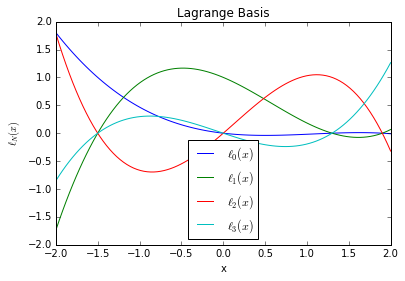

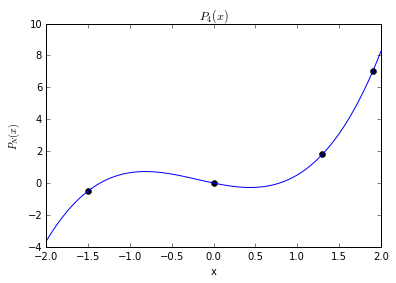

In [32]:
data = numpy.array([[-1.5, -0.5], [0.0, 0.0],[1.3, 1.8],[1.9, 7.0]])
x = numpy.linspace(-2,2,100)

N = data.shape[0]
lagrange_basis = numpy.ones((N,x.shape[0]))
for i in xrange(0,N):
    for j in xrange(N):
        if i != j:
            lagrange_basis[i,:] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])
polynomial = numpy.zeros(x.shape[0])
for n in xrange(N):
    polynomial += lagrange_basis[n,:] * data[n,1]
#print each lagrange basis individually
fig = plt.figure()
axes = fig.add_subplot(111)
for m in xrange(N):
    axes.plot(x,lagrange_basis[m,:],label = "$\ell_{%s}(x)$" % m)
axes.set_title("Lagrange Basis")
axes.set_ylabel("$\ell_N(x)$")
axes.set_xlabel("x")
axes.legend(loc = 8)

#plot lagrange polynomial fitting sample data
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data[:,0],data[:,1],'ko',label = 'Sample data')
axes.plot(x,polynomial,'b',label = 'Interpolation')
axes.set_title("$P_{%s}(x)$" % N)
axes.set_ylabel("$P_N(x)$")
axes.set_xlabel("x")

### Lagrange basis fitting sin(x) using sample data

Observe that when lagrange polynomial goese beyond sample range, the values starts to mess up.

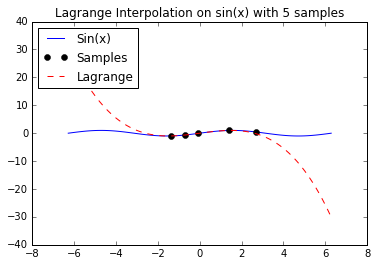

In [54]:
#Sample data on sin(x)
SAMPLE = 5

x_sample = numpy.random.rand(SAMPLE) * 2.0 * numpy.pi - numpy.pi
y_sample = numpy.sin(x_sample)

x = numpy.linspace(-2.0*numpy.pi, 2.0*numpy.pi, 100)

#Calculate lagrange basis
N = Sample - 1
lagrange_basis = numpy.ones((N,x.shape[0]))
for i in xrange(N):
    for j in xrange(N):
        if i != j:
            lagrange_basis[i,:] *= (x - x_sample[j]) / (x_sample[i] - x_sample[j])
#Calculate lagrange polynomial
poly = numpy.zeros(x.shape[0])
for n in xrange(N):
    poly += lagrange_basis[n,:] * y_sample[n]

#Plot fitting curve
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(x,numpy.sin(x),'b',label = "Sin(x)")
axes.plot(x_sample,y_sample,'ko',label = "Samples")
axes.plot(x,poly,'r--',label = "Lagrange")
axes.set_title("Lagrange Interpolation on sin(x) with %s samples" % SAMPLE)
axes.legend(loc = 2)

### Chebyshev Nodes: is the roots of Chebyshev polynomials

Plot the Chebyshev nodes by given N

(-1.1, 1.1)

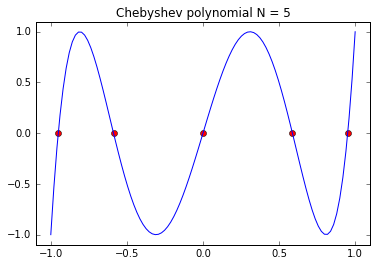

In [112]:
import numpy.polynomial.polynomial as polynomial

y_ref = lambda r: numpy.cos(r)
N = 5
x = numpy.linspace(-1,1,100)

#Initialize figure
fig = plt.figure()
axes = fig.add_subplot(111)


#Chebyshev Nodes
chebyshev_nodes = []
for k in xrange(1,N+1):
    chebyshev_nodes.append(numpy.cos((2.0 * k - 1.0)*numpy.pi/(2.0 * N)))
axes.plot(chebyshev_nodes,numpy.zeros(numpy.size(chebyshev_nodes)),'ro')

#Chebyshev polynomials
chebyshev_poly = [1.0, [0.0, 1.0]]
if N >= 2:
    for k in xrange(0,N):
            temp = polynomial.polysub(polynomial.polymul(chebyshev_poly[k+1], [0.0 ,2.0]),chebyshev_poly[k])
            chebyshev_poly.append(temp.tolist())

P_N = polynomial.Polynomial(chebyshev_poly[N])
axes.plot(x,P_N(x))
axes.set_title("Chebyshev polynomial N = %s" %N)
axes.set_xlim((-1.1,1.1))
axes.set_ylim((-1.1,1.1))

### Piece-wise Polynomial interpolations

#### 1. $C^0$ Piece-Wise Linear

Method 1: Linear function

$$\mathcal{P}_k(x) = \frac{y_{k+1} - y_k}{x_{k+1} - x_k} (x - x_k) + y_k$$

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False 

(-3.0, 15.0)

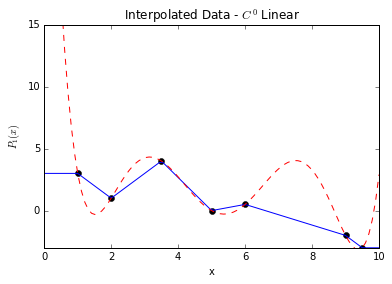

In [111]:
#data[0] is the time variant, and data[1] is the measurement
data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)

# Lagrange Basis as reference curve
N = data.shape[0] - 1
lagrange_basis = numpy.ones((N + 1, x.shape[0]))
for i in xrange(N + 1):
    for j in xrange(N + 1):
        if i != j:
            lagrange_basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])

P_lagrange = numpy.zeros(x.shape[0])
for n in xrange(N + 1):
    P_lagrange += lagrange_basis[n, :] * data[n, 1]

#Watch this technique below which can be used to replace locating loop
print (x > data[3, 0]) #listing range t > t3
print (x <= data[4, 0]) #listing range t <= t4
print (x > data[3, 0]) *  (x <= data[4, 0]) # listing range t3 < t < t4

#Building lines across every two points
P_linear = numpy.zeros(x.shape)
for n in xrange(0,N):
    P_linear += ((data[n+1,1] - data[n,1]) / (data[n+1,0] - data[n,0]) * (x - data[n,0])
                    + data[n,1]) * (x > data[n,0]) * (x <= data[n+1,0])
#Add end points for continuity
P_linear += numpy.ones(x.shape) * data[0,1] * (x <= data[0,0]) 
P_linear += numpy.ones(x.shape) * data[N,1] * (x > data[N,0])

#Plot
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data[:,0], data[:,1], 'ko', label = 'data')
axes.plot(x, P_linear, 'b')
axes.plot(x, P_lagrange, 'r--')

axes.set_title("Interpolated Data - $C^0$ Linear")
axes.set_xlabel("x")
axes.set_ylabel("$P_1(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-3.0, 15.0])

Method 2: Try to use polyfit() to construct the same plot (piece-wise linear interpolation)

In [3]:
#data[0] is the time variant, and data[1] is the measurement
data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)
# Lagrange Basis as reference curve
N = data.shape[0] - 1
lagrange_basis = numpy.ones((N + 1, x.shape[0]))
for i in xrange(N + 1):
    for j in xrange(N + 1):
        if i != j:
            lagrange_basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])

P_lagrange = numpy.zeros(x.shape[0])
for n in xrange(N + 1):
    P_lagrange += lagrange_basis[n, :] * data[n, 1]
    
P_linear = numpy.zeros(x.shape)
#print data[-1, 1]
for n in xrange(0,N,1):
    coefficients = numpy.polyfit(data[n:n+2,0], data[n:n+2,1], 1)
    P_linear += numpy.polyval(coefficients, x)

#Add end points for continuity
P_linear += numpy.ones(x.shape) * data[0,1] * (x <= data[0,0]) 
P_linear += numpy.ones(x.shape) * data[N,1] * (x > data[N,0])